# Predicting Sales — A  Gentle  Analysis

# Imports
We are using a typical data science stack: numpy, pandas, sklearn, matplotlib

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats # I might use this
from sklearn.ensemble import RandomForestClassifier 
from sklearn import preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn import cross_validation


In [5]:

import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so pretty!
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize']=(10,6)
%matplotlib inline


In [6]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Reading the data

In [7]:
df=pd.read_csv('df.csv')

In [8]:
df_ = df.copy()

# Glimpse of Data
Head data

In [5]:
df.head()

,Close Date,Customer ID,Product ID,Ship Mode,Segment,State,Category,Sales,Quantity
0,4/1/2019,CG-12520,FUR-BO-10001798,Second Class,Consumer,Kentucky,Furniture,261.9600,2
1,4/1/2019,CG-12520,FUR-CH-10000454,Second Class,Consumer,Kentucky,Furniture,731.9400,3
2,4/1/2019,DV-13045,OFF-LA-10000240,Second Class,Corporate,California,Office Supplies,14.6200,2
3,4/1/2019,SO-20335,FUR-TA-10000577,Standard Class,Consumer,Florida,Furniture,957.5775,5
4,4/1/2019,SO-20335,OFF-ST-10000760,Standard Class,Consumer,Florida,Office Supplies,22.3680,2


## df.columns.values

In [6]:
df.columns.values

array(['Close Date', 'Customer ID', 'Product ID', 'Ship Mode', 'Segment',
       'State', 'Category', 'Sales', 'Quantity'], dtype=object)

> df.shape.
  We have total 9994 rows and 9 columns

In [7]:
df.shape

(9994, 9)

Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
Close Date     9994 non-null object
Customer ID    9994 non-null object
Product ID     9994 non-null object
Ship Mode      9994 non-null object
Segment        9994 non-null object
State          9994 non-null object
Category       9994 non-null object
Sales          9994 non-null float64
Quantity       9994 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 702.8+ KB


In [9]:
df.describe()

,Sales,Quantity
count,9994.000000,9994.000000
mean,229.858001,3.789574
std,623.245101,2.225110
min,0.444000,1.000000
25%,17.280000,2.000000
50%,54.490000,3.000000
75%,209.940000,5.000000
max,22638.480000,14.000000


## Column Types

Let's look at the number of columns of each data type. int64, float64 and object are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. 

In [10]:
df.dtypes.value_counts()

object     7
float64    1
int64      1
dtype: int64

In [11]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Close Date      212
Customer ID     793
Product ID     1862
Ship Mode         4
Segment           3
State            49
Category          3
dtype: int64

## Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.

In [12]:
features = df.columns.values[0:30]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = df[feature].value_counts()
    perc = values.max() / ( df.shape[0]*100 )
    unique_max_train.append([feature, values.max(), values.idxmax(), perc])
    
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicados', 'Valor', 'Percentage'])).\
            sort_values(by = 'Max duplicados', ascending=False).head(15))

,6,3,4,8,5,0,7,1,2
Feature,Category,Ship Mode,Segment,Quantity,State,Close Date,Sales,Customer ID,Product ID
Max duplicados,6026,5968,5191,2409,2001,341,56,37,19
Valor,Office Supplies,Standard Class,Consumer,3,California,10/31/2019,12.96,WB-21850,OFF-PA-10001970
Percentage,0.00602962,0.00597158,0.00519412,0.00241045,0.0020022,0.000341205,5.60336e-05,3.70222e-05,1.90114e-05


A simple percentage count of the unique observations in each feature.

In [13]:
for column in df.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

col_0,% observations
Close Date,
10/1/2019,0.003102
10/10/2019,0.005403
10/11/2019,0.006004
10/13/2019,0.000100
10/14/2019,0.004102
10/15/2019,0.007004
10/16/2019,0.005303
10/17/2019,0.007304
10/18/2019,0.007004


col_0,% observations
Customer ID,
AA-10315,0.001101
AA-10375,0.001501
AA-10480,0.001201
AA-10645,0.001801
AB-10015,0.000600
AB-10060,0.001801
AB-10105,0.002001
AB-10150,0.001201
AB-10165,0.001401


col_0,% observations
Product ID,
FUR-BO-10000112,0.000100
FUR-BO-10000330,0.000300
FUR-BO-10000362,0.000500
FUR-BO-10000468,0.000600
FUR-BO-10000711,0.000200
FUR-BO-10000780,0.000500
FUR-BO-10001337,0.001001
FUR-BO-10001519,0.000500
FUR-BO-10001567,0.000100


col_0,% observations
Ship Mode,
First Class,0.153892
Same Day,0.054333
Second Class,0.194617
Standard Class,0.597158


col_0,% observations
Segment,
Consumer,0.519412
Corporate,0.302181
Home Office,0.178407


col_0,% observations
State,
Alabama,0.006104
Arizona,0.022413
Arkansas,0.006004
California,0.200220
Colorado,0.018211
Connecticut,0.008205
Delaware,0.009606
District of Columbia,0.001001
Florida,0.038323


col_0,% observations
Category,
Furniture,0.212227
Office Supplies,0.602962
Technology,0.184811


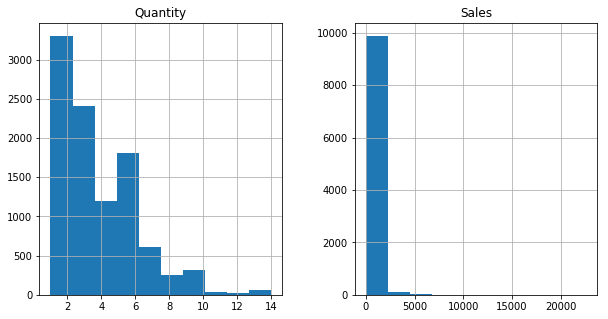

In [14]:
hist = df.hist(figsize=(10, 5))

## Target Variable Analysis
So let's take a look at the Sale Price data and check for normality, and try to correct it otherwise

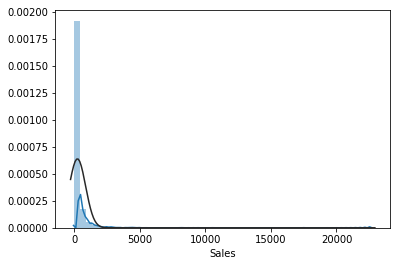

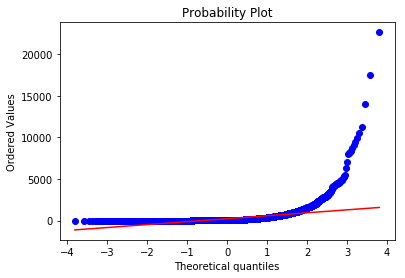

In [15]:
# histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df['Sales'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['Sales'], plot=plt)

So, certainly not normal: we have right-skewness and the data is a bit peak-y. Let's apply a log transform on the data and see what happens...

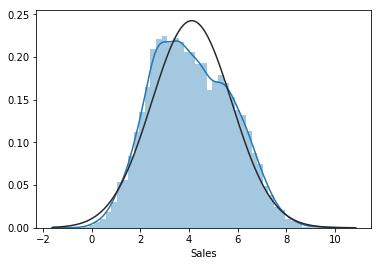

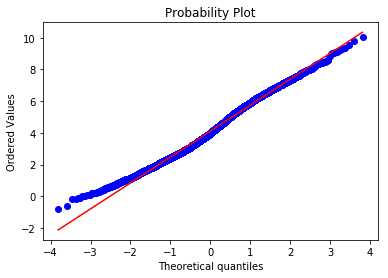

In [16]:
df['Sales'] = np.log(df['Sales'])
sns.distplot(df['Sales'],fit=norm);
fig = plt.figure()
res = stats.probplot(df['Sales'], plot=plt)

A Better Fit!
That looks much more normal

# Examine Missing Values
Next we can look at the number and percentage of missing values in each column

In [17]:
# checking missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(10)

,Total,Percent
Quantity,0,0.0
Sales,0,0.0
Category,0,0.0
State,0,0.0
Segment,0,0.0
Ship Mode,0,0.0
Product ID,0,0.0
Customer ID,0,0.0
Close Date,0,0.0


**Great, not missing value!**

# Correlation of int, float values

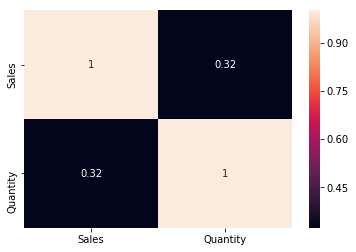

In [18]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

## Feature Engineering
Let's take a look at the distribution of the Sales

In [19]:
df.head(1)

,Close Date,Customer ID,Product ID,Ship Mode,Segment,State,Category,Sales,Quantity
0,4/1/2019,CG-12520,FUR-BO-10001798,Second Class,Consumer,Kentucky,Furniture,5.568192,2


In [9]:
import datetime

df['Close Date'] = pd.to_datetime(df['Close Date'],infer_datetime_format=True)
df['month'] = df['Close Date'].dt.month
df['weekday'] = df['Close Date'].dt.dayofweek
df['year'] = df['Close Date'].dt.year
df['week_of_year']  = df['Close Date'].dt.weekofyear

In [10]:
df['month'].value_counts() # groupby(['Close Date']).head()

10    1741
12    1499
7     1310
4     1120
9     1085
11    1016
6      843
8      716
5      664
Name: month, dtype: int64

In [11]:
df.drop(['Close Date'], axis=1, inplace=True)

Let's take a look at the distribution of the Sales

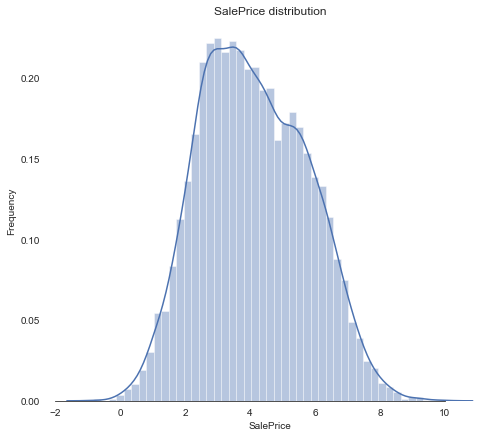

In [23]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['Sales'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

The Sales is soft skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) tranform to fix the skew.

In [24]:
# log(1+x) transform
df["Sales"] = np.log1p(df["Sales"])

Let's plot the Sales again.


 mu = 1.57 and sigma = 0.35



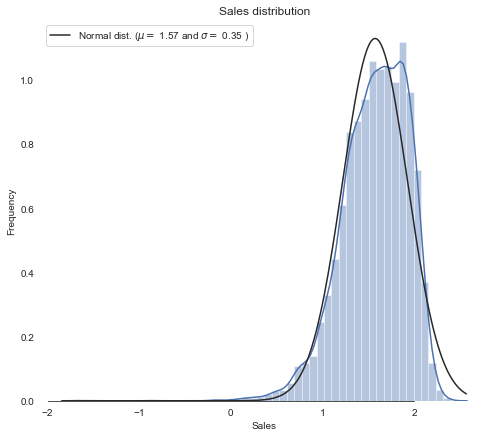

In [25]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df['Sales'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="Sales distribution")
sns.despine(trim=True, left=True)

plt.show()

The Sales is now normally distributed, excellent!

# Building a model and training it

Then, if there are missing values in your data, fill them with a high negative value so that it doesn't have any impact in the model. But in our case, there not missing value.


In [12]:

for f in df.columns: 
    if df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(df[f].values)) 
        df[f] = lbl.transform(list(df[f].values))
df.fillna((-999), inplace=True)
df.fillna((-999), inplace=True)
        
# for Random Forest regression
X2 = df.drop(['Sales'], axis=1) # take all the features except the target variable
y2 = df['Sales'] # the target variable
        
# Séparer entre training set et test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2)

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor_rd = RandomForestRegressor(n_estimators = 2000)
y_train = np.ravel(y_train)
regressor_rd.fit(X_train, y_train)

y_pred_rd = regressor_rd.predict(X_test)

## A Random Tree Regressor
 Create Estimator and Apply Cross Validation

In [14]:
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
scorer = make_scorer(r2_score, False)


C:\Users\crislanio_macedo\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


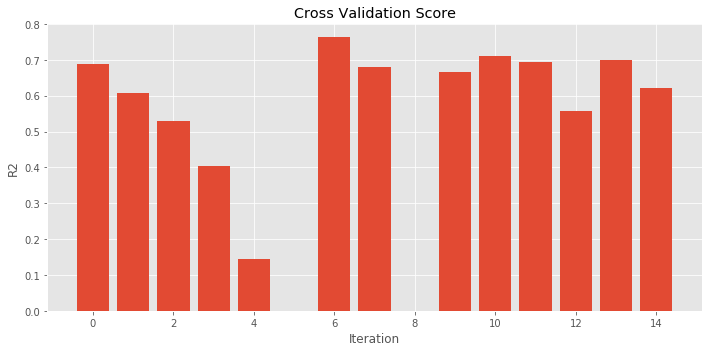

In [15]:
clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
cv_score = np.sqrt(-cross_val_score(estimator=clf, X=X_train, y=y_train, cv=15, scoring = scorer))

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('R2')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

### Visualize Predicted vs. Actual Sales
In order to visualize our predicted values vs our actual values we need to split our data into training and testing data sets. This can easily be accomplished using sklearn's train_test_split module.

We will train the model using a random sampling of our data set and then compare visually against the actual values

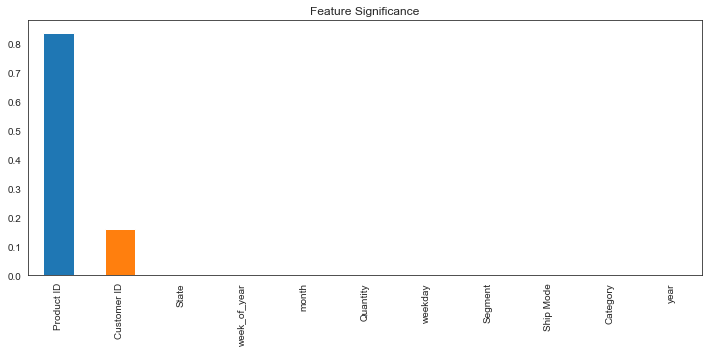

In [37]:
# Fit model with training data
clf.fit(X_train, X_train)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(clf.feature_importances_, index = X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

## Linear regression 

In [16]:
#1. linear regression 
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
#r square 
print("R-Square : " ,model.score(X_test,y_test))

R-Square :  0.033122101503117896


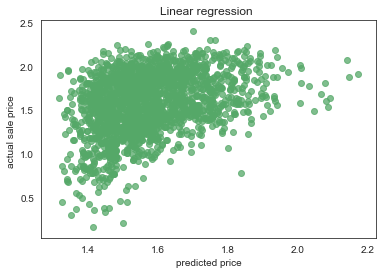

In [39]:
plt.scatter(preds, y_test, alpha=.75, color='g')
plt.xlabel('predicted price')
plt.ylabel('actual sale price ')
plt.title('Linear regression ')
plt.show()

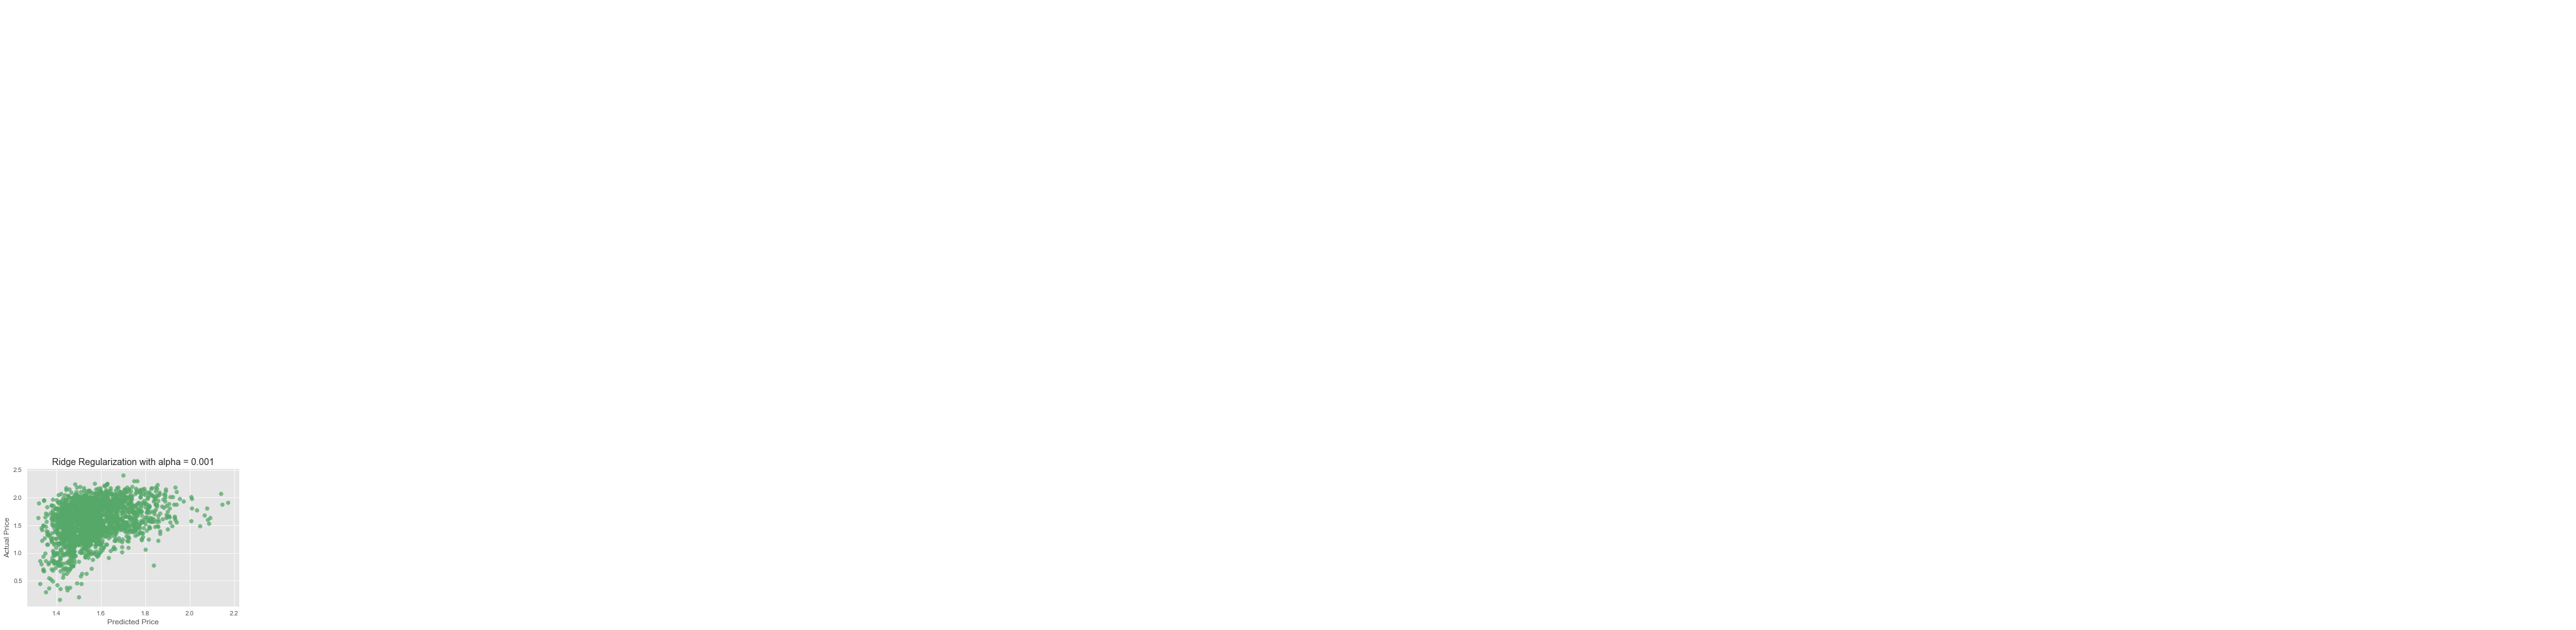

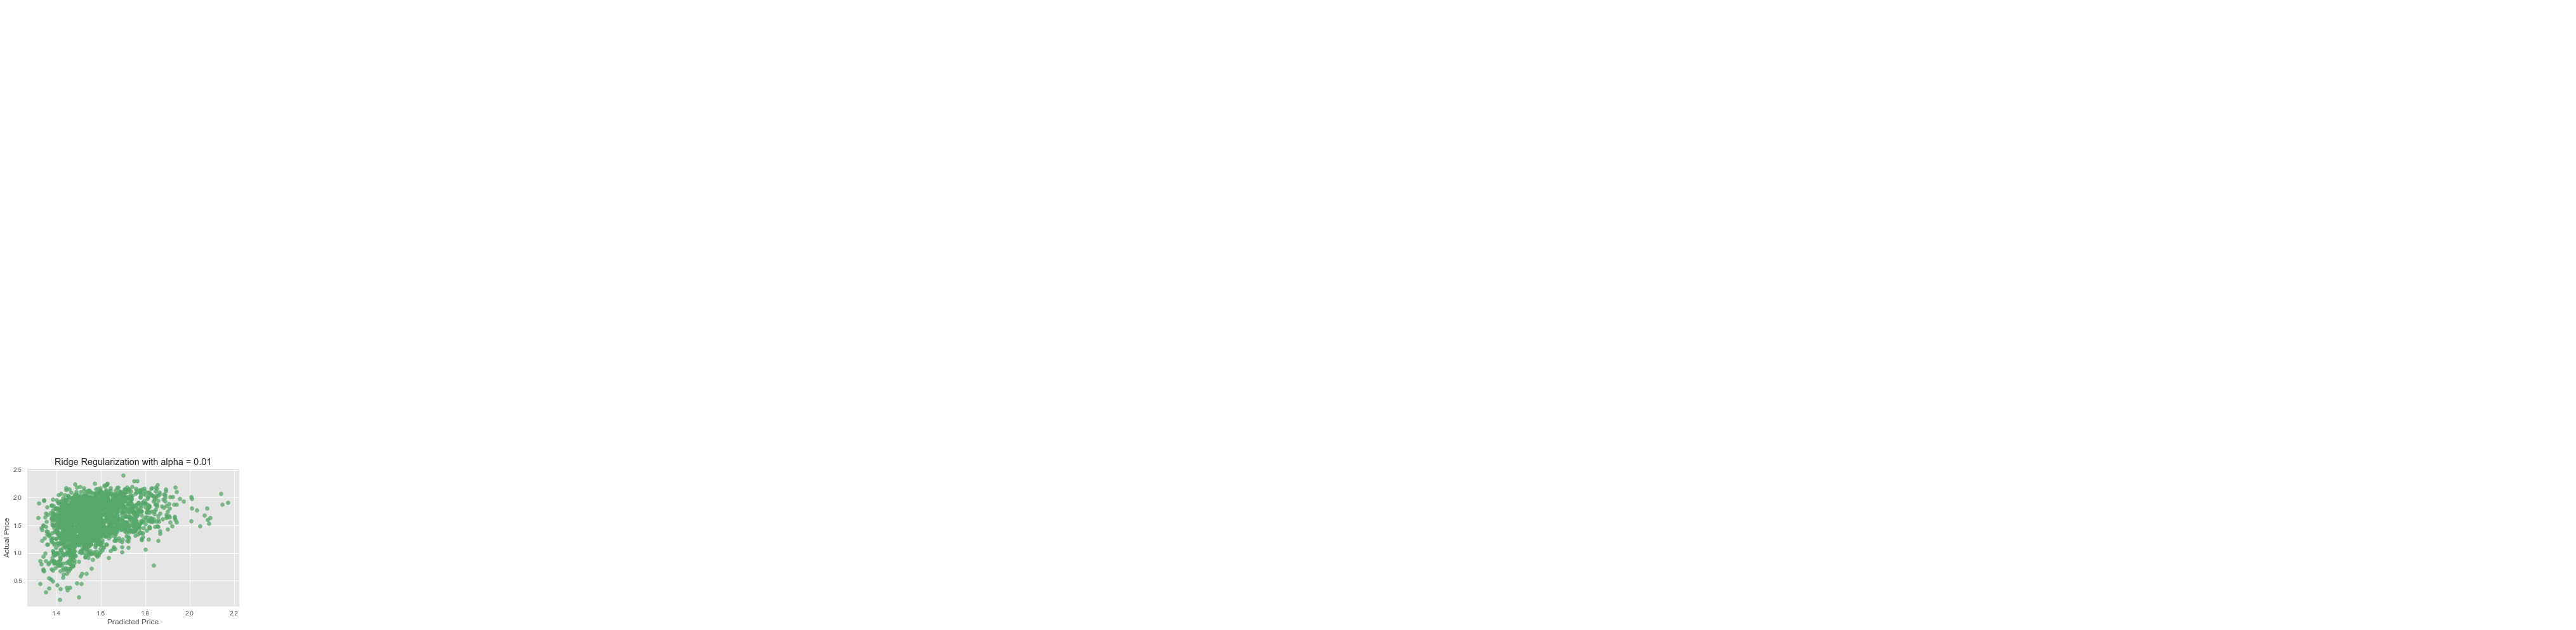

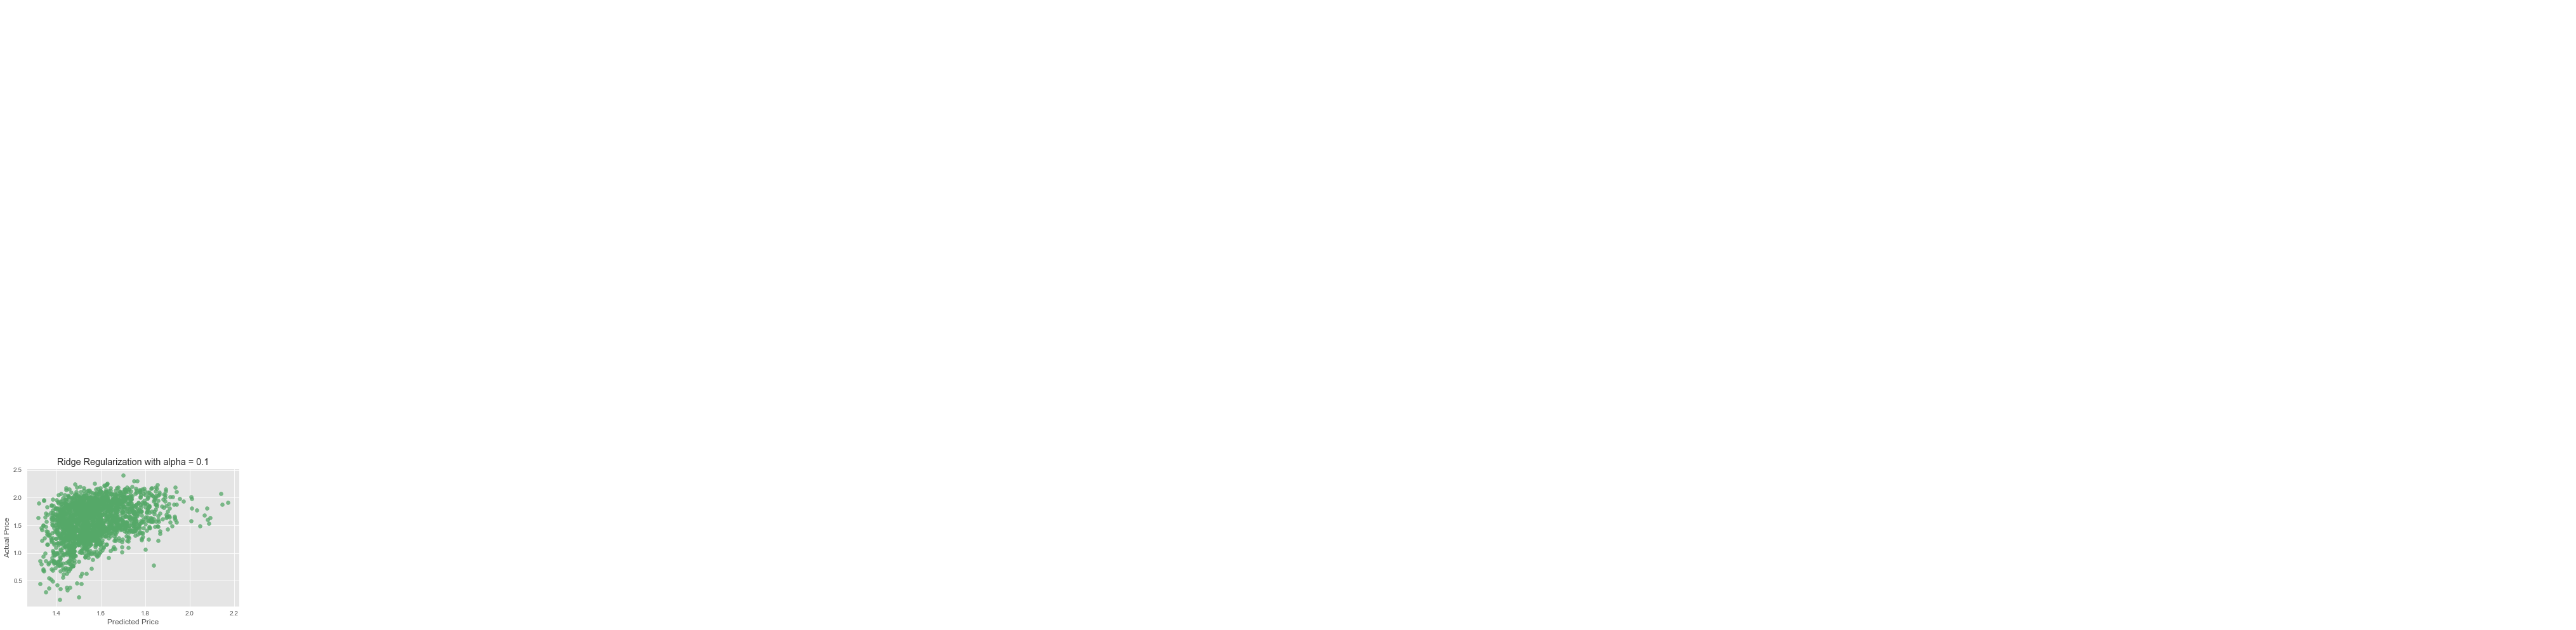

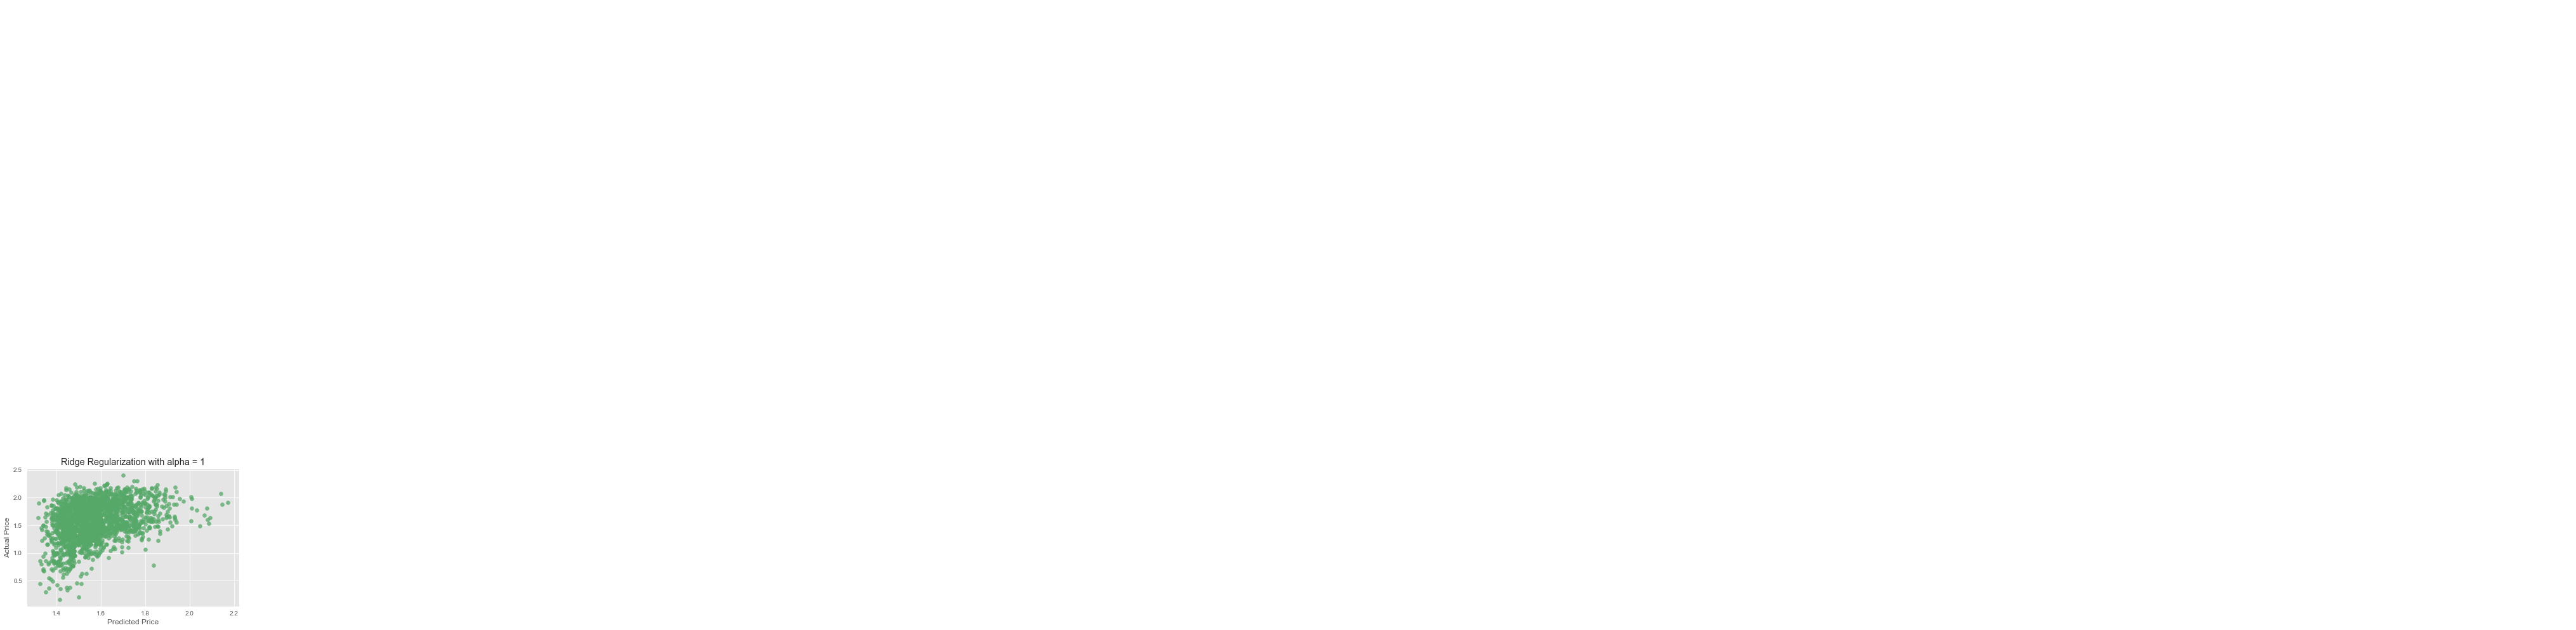

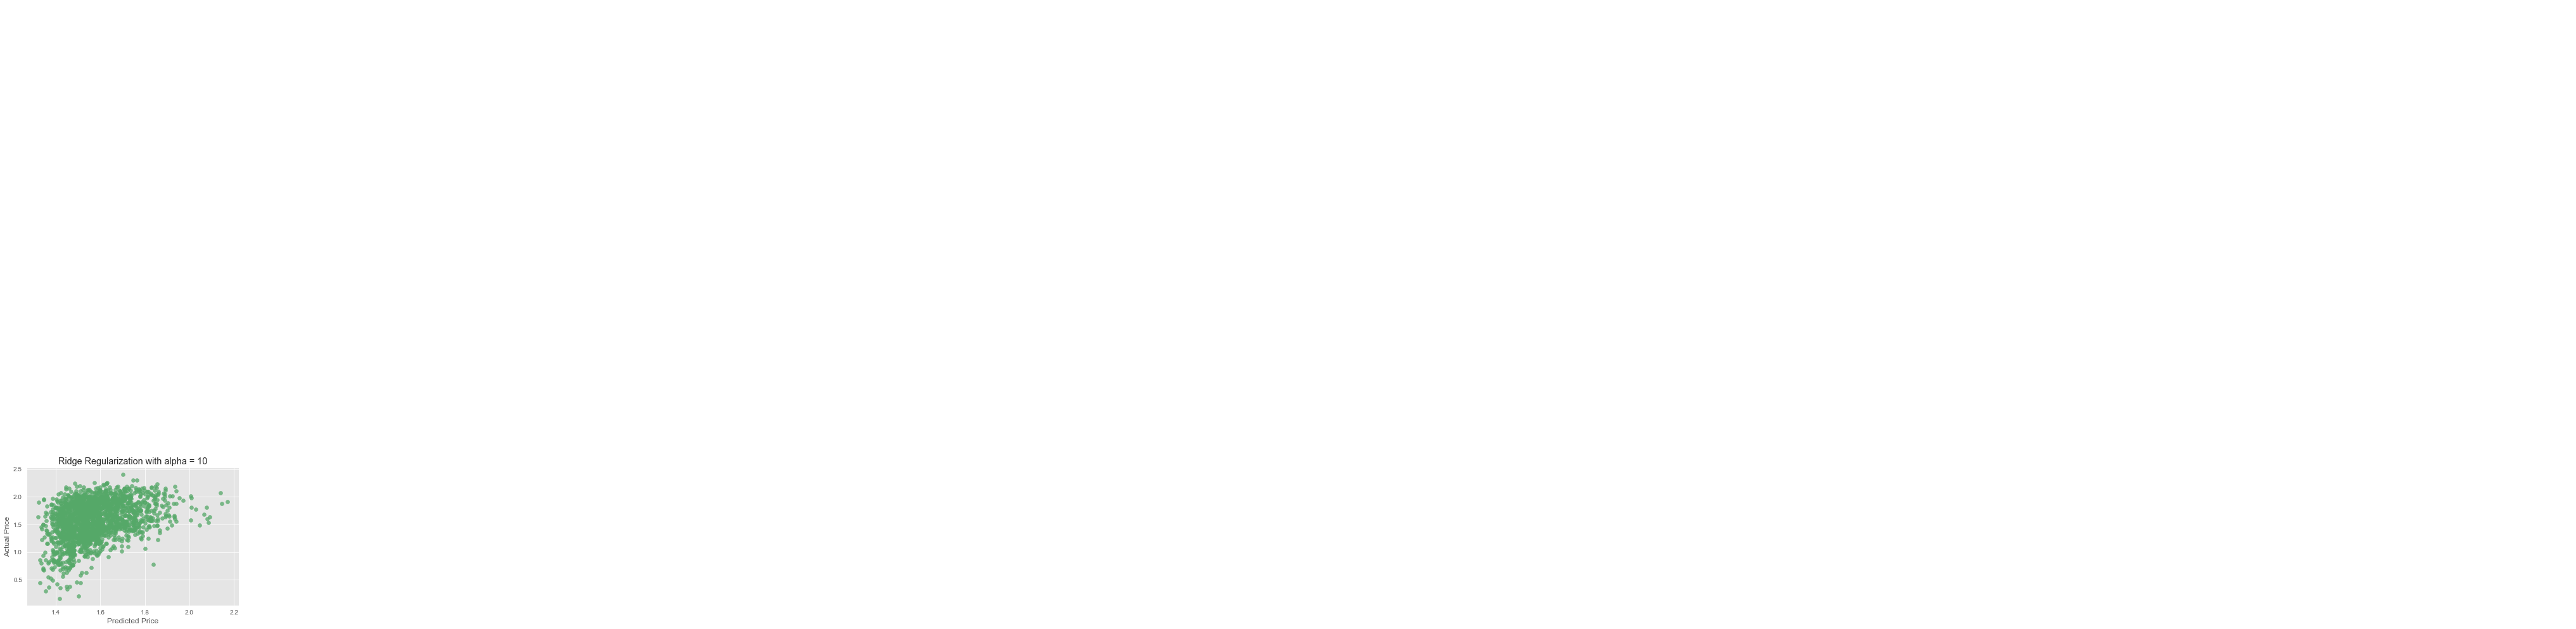

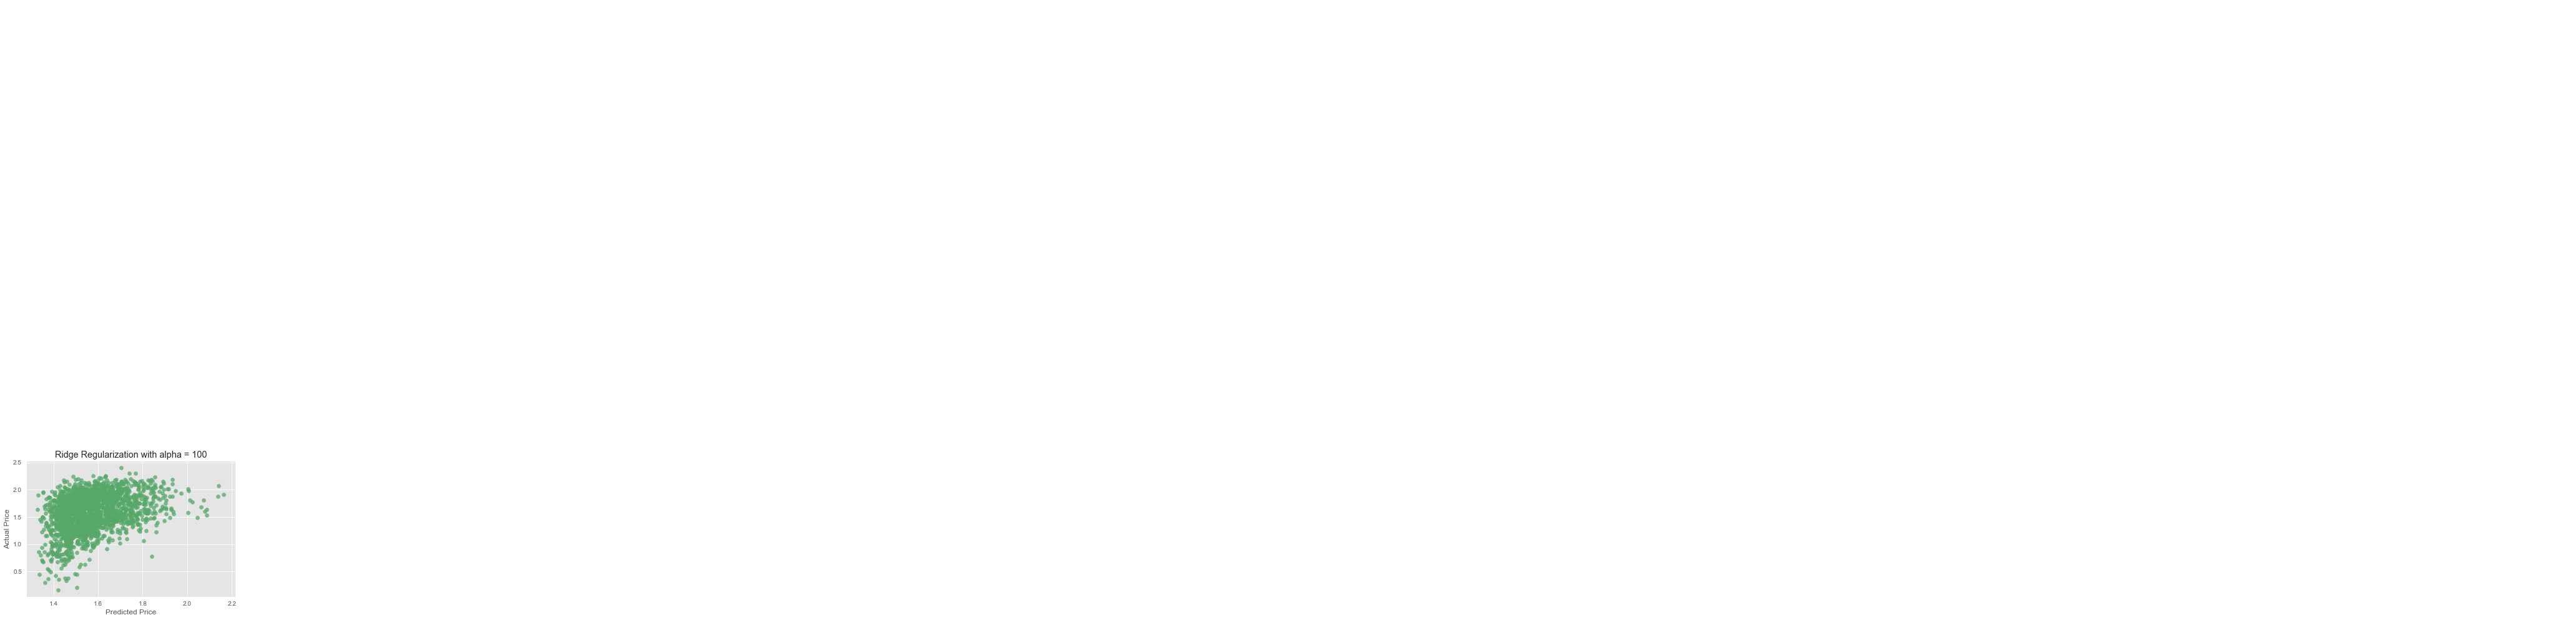

In [43]:
#Regularization 
for i in range (-3, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    plt.scatter(preds_ridge, y_test, alpha=.75, color='g')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test),
                                               mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

# The end